In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers.core import Flatten,Dense
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
test_dir="/kaggle/input/new-plant-diseases-dataset/test"
diseases = os.listdir(train_dir)
test_disease=os.listdir(test_dir+"/test")
diseases.sort()
test_disease.sort()
print(len(diseases))
print(test_disease)

38
['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 'AppleScab3.JPG', 'CornCommonRust1.JPG', 'CornCommonRust2.JPG', 'CornCommonRust3.JPG', 'PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoYellowCurlVirus5.JPG', 'TomatoYellowCurlVirus6.JPG']


In [3]:
for plant in diseases:
    print(plant.split('___'))

['Apple', 'Apple_scab']
['Apple', 'Black_rot']
['Apple', 'Cedar_apple_rust']
['Apple', 'healthy']
['Blueberry', 'healthy']
['Cherry_(including_sour)', 'Powdery_mildew']
['Cherry_(including_sour)', 'healthy']
['Corn_(maize)', 'Cercospora_leaf_spot Gray_leaf_spot']
['Corn_(maize)', 'Common_rust_']
['Corn_(maize)', 'Northern_Leaf_Blight']
['Corn_(maize)', 'healthy']
['Grape', 'Black_rot']
['Grape', 'Esca_(Black_Measles)']
['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)']
['Grape', 'healthy']
['Orange', 'Haunglongbing_(Citrus_greening)']
['Peach', 'Bacterial_spot']
['Peach', 'healthy']
['Pepper,_bell', 'Bacterial_spot']
['Pepper,_bell', 'healthy']
['Potato', 'Early_blight']
['Potato', 'Late_blight']
['Potato', 'healthy']
['Raspberry', 'healthy']
['Soybean', 'healthy']
['Squash', 'Powdery_mildew']
['Strawberry', 'Leaf_scorch']
['Strawberry', 'healthy']
['Tomato', 'Bacterial_spot']
['Tomato', 'Early_blight']
['Tomato', 'Late_blight']
['Tomato', 'Leaf_Mold']
['Tomato', 'Septoria_leaf_spot']
['T

In [4]:
plants=[]
numberDisease=0
for plant in diseases:
#     print(plant)
#     print(numberDisease)
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        numberDisease+=1
print(plants)
print(len(plants))
print(numberDisease)

['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
14
26


In [5]:
number={}
for name in diseases:
    number[name]=len(os.listdir(train_dir+'/'+name))
print(number)  

{'Apple___Apple_scab': 2016, 'Apple___Black_rot': 1987, 'Apple___Cedar_apple_rust': 1760, 'Apple___healthy': 2008, 'Blueberry___healthy': 1816, 'Cherry_(including_sour)___Powdery_mildew': 1683, 'Cherry_(including_sour)___healthy': 1826, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642, 'Corn_(maize)___Common_rust_': 1907, 'Corn_(maize)___Northern_Leaf_Blight': 1908, 'Corn_(maize)___healthy': 1859, 'Grape___Black_rot': 1888, 'Grape___Esca_(Black_Measles)': 1920, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722, 'Grape___healthy': 1692, 'Orange___Haunglongbing_(Citrus_greening)': 2010, 'Peach___Bacterial_spot': 1838, 'Peach___healthy': 1728, 'Pepper,_bell___Bacterial_spot': 1913, 'Pepper,_bell___healthy': 1988, 'Potato___Early_blight': 1939, 'Potato___Late_blight': 1939, 'Potato___healthy': 1824, 'Raspberry___healthy': 1781, 'Soybean___healthy': 2022, 'Squash___Powdery_mildew': 1736, 'Strawberry___Leaf_scorch': 1774, 'Strawberry___healthy': 1824, 'Tomato___Bacterial_spot': 17

In [6]:
train_datagen1=ImageDataGenerator(rescale=1.0/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True)

In [7]:
val_datagen1=ImageDataGenerator(rescale=1.0/255)

In [8]:
test_datagen1=ImageDataGenerator(rescale=1.0/255)

In [9]:
training_set1=train_datagen1.flow_from_directory(train_dir,
                                                 target_size=(100,100),
                                                batch_size=64,
                                                class_mode='categorical')
print(training_set1)

Found 70295 images belonging to 38 classes.


In [10]:
val_set1=val_datagen1.flow_from_directory(valid_dir,
                                                 target_size=(100,100),
                                                batch_size=64,
                                                class_mode='categorical')

Found 17572 images belonging to 38 classes.


In [11]:
test_set1=test_datagen1.flow_from_directory(test_dir,
                                                 target_size=(100,100),
                                                batch_size=64,
                                                class_mode='categorical',
                                           shuffle=None)

Found 33 images belonging to 1 classes.


In [12]:
i=0
print('List of test set examples.')
for name in test_disease:
    print(i, name)
    i=i+1

List of test set examples.
0 AppleCedarRust1.JPG
1 AppleCedarRust2.JPG
2 AppleCedarRust3.JPG
3 AppleCedarRust4.JPG
4 AppleScab1.JPG
5 AppleScab2.JPG
6 AppleScab3.JPG
7 CornCommonRust1.JPG
8 CornCommonRust2.JPG
9 CornCommonRust3.JPG
10 PotatoEarlyBlight1.JPG
11 PotatoEarlyBlight2.JPG
12 PotatoEarlyBlight3.JPG
13 PotatoEarlyBlight4.JPG
14 PotatoEarlyBlight5.JPG
15 PotatoHealthy1.JPG
16 PotatoHealthy2.JPG
17 TomatoEarlyBlight1.JPG
18 TomatoEarlyBlight2.JPG
19 TomatoEarlyBlight3.JPG
20 TomatoEarlyBlight4.JPG
21 TomatoEarlyBlight5.JPG
22 TomatoEarlyBlight6.JPG
23 TomatoHealthy1.JPG
24 TomatoHealthy2.JPG
25 TomatoHealthy3.JPG
26 TomatoHealthy4.JPG
27 TomatoYellowCurlVirus1.JPG
28 TomatoYellowCurlVirus2.JPG
29 TomatoYellowCurlVirus3.JPG
30 TomatoYellowCurlVirus4.JPG
31 TomatoYellowCurlVirus5.JPG
32 TomatoYellowCurlVirus6.JPG


In [13]:
i=0
print('All diseased and healthy plants categories.')
for name in diseases:
    print(i, name)
    i=i+1

All diseased and healthy plants categories.
0 Apple___Apple_scab
1 Apple___Black_rot
2 Apple___Cedar_apple_rust
3 Apple___healthy
4 Blueberry___healthy
5 Cherry_(including_sour)___Powdery_mildew
6 Cherry_(including_sour)___healthy
7 Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8 Corn_(maize)___Common_rust_
9 Corn_(maize)___Northern_Leaf_Blight
10 Corn_(maize)___healthy
11 Grape___Black_rot
12 Grape___Esca_(Black_Measles)
13 Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14 Grape___healthy
15 Orange___Haunglongbing_(Citrus_greening)
16 Peach___Bacterial_spot
17 Peach___healthy
18 Pepper,_bell___Bacterial_spot
19 Pepper,_bell___healthy
20 Potato___Early_blight
21 Potato___Late_blight
22 Potato___healthy
23 Raspberry___healthy
24 Soybean___healthy
25 Squash___Powdery_mildew
26 Strawberry___Leaf_scorch
27 Strawberry___healthy
28 Tomato___Bacterial_spot
29 Tomato___Early_blight
30 Tomato___Late_blight
31 Tomato___Leaf_Mold
32 Tomato___Septoria_leaf_spot
33 Tomato___Spider_mites Two-spotte

In [14]:
model_lr=Sequential()
model_lr.add(Flatten(input_shape=(100,100,3)))
model_lr.add(Dense(38))
model_lr.add(Activation('softmax'))
model_lr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 38)                1140038   
_________________________________________________________________
activation (Activation)      (None, 38)                0         
Total params: 1,140,038
Trainable params: 1,140,038
Non-trainable params: 0
_________________________________________________________________


2021-12-28 13:01:05.402626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 13:01:05.528894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 13:01:05.529983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 13:01:05.532164: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
optimizer_lr=Adam(learning_rate=0.001)
model_lr.compile(optimizer=optimizer_lr,loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history_lr=model_lr.fit(training_set1,epochs=5,validation_data=val_set1)

2021-12-28 13:01:33.221988: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1099/1099 [==============================] - 744s 676ms/step - loss: 5.1475 - accuracy: 0.2328 - val_loss: 3.6456 - val_accuracy: 0.3071
Epoch 2/5
1099/1099 [==============================] - 286s 261ms/step - loss: 4.1064 - accuracy: 0.2954 - val_loss: 4.2053 - val_accuracy: 0.2915
Epoch 3/5
1099/1099 [==============================] - 282s 256ms/step - loss: 4.1959 - accuracy: 0.3137 - val_loss: 4.4728 - val_accuracy: 0.3081
Epoch 4/5
1099/1099 [==============================] - 282s 257ms/step - loss: 4.2096 - accuracy: 0.3205 - val_loss: 4.1369 - val_accuracy: 0.3519
Epoch 5/5
1099/1099 [==============================] - 282s 256ms/step - loss: 4.2051 - accuracy: 0.3326 - val_loss: 4.5104 - val_accuracy: 0.3421


In [18]:
model_lr.evaluate(val_set1)

275/275 [==============================] - 27s 98ms/step - loss: 4.5104 - accuracy: 0.3421


[4.510408401489258, 0.3421352207660675]

(100, 100, 3)
(1, 100, 100, 3)
True Label:  AppleCedarRust1.JPG
Prediction Number:  [4]
Prediction Name:  Blueberry___healthy


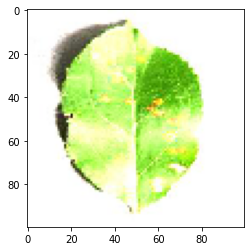

In [24]:
image_path = "../input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"
new_img = image.load_img(image_path, target_size=(100, 100))
img = image.img_to_array(new_img)
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction = model_lr.predict(img)
prediction = np.argmax(prediction,axis=1)
print('True Label: ', test_disease[0])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleCedarRust2.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy


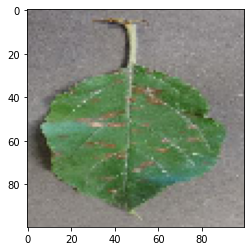

In [25]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleCedarRust2.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_lr.predict(img)
# print(prediction)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[1])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleCedarRust3.JPG
Prediction Number:  [36]
Prediction Name:  Tomato___Tomato_mosaic_virus


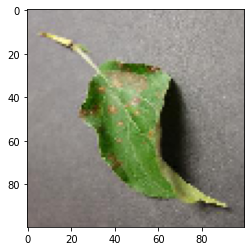

In [26]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleCedarRust3.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_lr.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[2])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleCedarRust4.JPG
Prediction Number:  [26]
Prediction Name:  Strawberry___Leaf_scorch


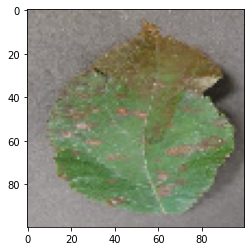

In [27]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleCedarRust4.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_lr.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[3])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleScab1.JPG
Prediction Number:  [14]
Prediction Name:  Grape___healthy


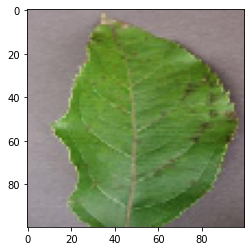

In [28]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleScab1.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_lr.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[4])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleScab2.JPG
Prediction Number:  [0]
Prediction Name:  Apple___Apple_scab


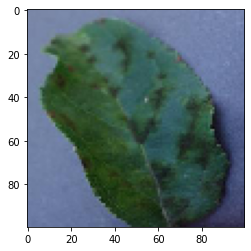

In [29]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleScab2.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_lr.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[5])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

In [30]:
j=0
image_path='../input/new-plant-diseases-dataset/test/test/'
for name in test_disease:
    image_path1=image_path+name
    new_img=image.load_img(image_path1,target_size=(100,100))
    img=image.img_to_array(new_img)
    img=np.expand_dims(img,axis=0)
    prediction=model_lr.predict(img)
    prediction=np.argmax(prediction,axis=1)
    print('True Label: ', test_disease[j])
    print('Prediction Number: ',prediction)
    print('Prediction Name: ',diseases[prediction[0]])
#     plt.imshow(new_img)
    print()
    j+=1
    


True Label:  AppleCedarRust1.JPG
Prediction Number:  [4]
Prediction Name:  Blueberry___healthy

True Label:  AppleCedarRust2.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy

True Label:  AppleCedarRust3.JPG
Prediction Number:  [36]
Prediction Name:  Tomato___Tomato_mosaic_virus

True Label:  AppleCedarRust4.JPG
Prediction Number:  [26]
Prediction Name:  Strawberry___Leaf_scorch

True Label:  AppleScab1.JPG
Prediction Number:  [14]
Prediction Name:  Grape___healthy

True Label:  AppleScab2.JPG
Prediction Number:  [0]
Prediction Name:  Apple___Apple_scab

True Label:  AppleScab3.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy

True Label:  CornCommonRust1.JPG
Prediction Number:  [8]
Prediction Name:  Corn_(maize)___Common_rust_

True Label:  CornCommonRust2.JPG
Prediction Number:  [8]
Prediction Name:  Corn_(maize)___Common_rust_

True Label:  CornCommonRust3.JPG
Prediction Number:  [8]
Prediction Name:  Corn_(maize)___Common_rust_

True Label:

In [19]:
model_cnn=Sequential()

model_cnn.add(layers.Conv2D(filters=6, kernel_size=(3,3),
                           activation='relu',input_shape=(100,100,3)))
model_cnn.add(layers.MaxPooling2D(pool_size=(2,2),
                                 strides=(1,1),padding='valid'))

model_cnn.add(layers.Conv2D(filters=16, kernel_size=(3,3),
                           activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=(2,2),
                                 strides=(1,1),padding='valid'))

model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3),
                           activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=(2,2),
                                 strides=(2,2),padding='valid'))

model_cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3),
                           activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=(2,2),
                                 strides=(2,2),padding='valid'))

model_cnn.add(layers.Conv2D(filters=128, kernel_size=(3,3),
                           activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=(2,2),
                                 strides=(2,2),padding='valid'))

model_cnn.add(layers.Flatten())

model_cnn.add(layers.Dense(units=120, activation='relu'))

model_cnn.add(layers.Dense(units=84, activation='relu'))

model_cnn.add(layers.Dense(units=38, activation='softmax'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 97, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)       

In [20]:
optimizer_cnn=Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer_cnn,loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model_cnn.fit(training_set1,epochs=3,validation_data=val_set1)

Epoch 1/3


2021-12-28 13:34:00.378762: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1099/1099 [==============================] - 294s 262ms/step - loss: 1.5823 - accuracy: 0.5329 - val_loss: 1.4462 - val_accuracy: 0.5770
Epoch 2/3
1099/1099 [==============================] - 291s 264ms/step - loss: 0.6801 - accuracy: 0.7840 - val_loss: 0.9537 - val_accuracy: 0.7168
Epoch 3/3
1099/1099 [==============================] - 294s 268ms/step - loss: 0.4668 - accuracy: 0.8497 - val_loss: 0.5563 - val_accuracy: 0.8272


In [22]:
model_cnn.evaluate(val_set1)

275/275 [==============================] - 28s 101ms/step - loss: 0.5563 - accuracy: 0.8272


[0.5563361644744873, 0.8271682262420654]

(100, 100, 3)
(1, 100, 100, 3)
True Label:  AppleCedarRust1.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy


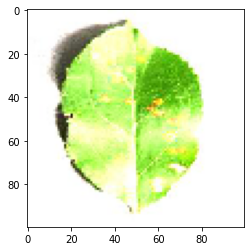

In [31]:
image_path = "../input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"
new_img = image.load_img(image_path, target_size=(100, 100))
img = image.img_to_array(new_img)
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction = model_cnn.predict(img)
prediction = np.argmax(prediction,axis=1)
print('True Label: ', test_disease[0])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleCedarRust2.JPG
Prediction Number:  [36]
Prediction Name:  Tomato___Tomato_mosaic_virus


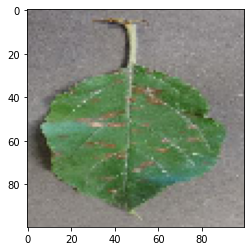

In [32]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleCedarRust2.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
# print(prediction)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[1])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleCedarRust3.JPG
Prediction Number:  [4]
Prediction Name:  Blueberry___healthy


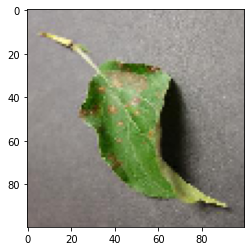

In [33]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleCedarRust3.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[2])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleCedarRust4.JPG
Prediction Number:  [2]
Prediction Name:  Apple___Cedar_apple_rust


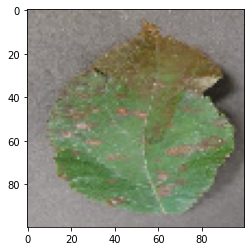

In [34]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleCedarRust4.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[3])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleScab1.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy


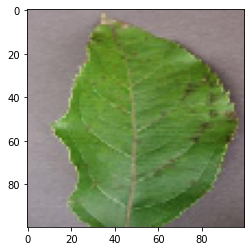

In [35]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleScab1.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[4])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

True Label:  AppleScab2.JPG
Prediction Number:  [1]
Prediction Name:  Apple___Black_rot


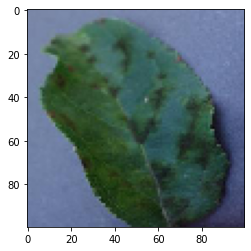

In [36]:
image_path='../input/new-plant-diseases-dataset/test/test/AppleScab2.JPG'
new_img=image.load_img(image_path,target_size=(100,100))
img=image.img_to_array(new_img)
img=np.expand_dims(img,axis=0)
prediction=model_cnn.predict(img)
prediction=np.argmax(prediction,axis=1)
print('True Label: ', test_disease[5])
print('Prediction Number: ',prediction)
print('Prediction Name: ',diseases[prediction[0]])
plt.imshow(new_img)

In [37]:
j=0
image_path='../input/new-plant-diseases-dataset/test/test/'
for name in test_disease:
    image_path1=image_path+name
    new_img=image.load_img(image_path1,target_size=(100,100))
    img=image.img_to_array(new_img)
    img=np.expand_dims(img,axis=0)
    prediction=model_cnn.predict(img)
    prediction=np.argmax(prediction,axis=1)
    print('True Label: ', test_disease[j])
    print('Prediction Number: ',prediction)
    print('Prediction Name: ',diseases[prediction[0]])
#     plt.imshow(new_img)
    print()
    j+=1
    


True Label:  AppleCedarRust1.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy

True Label:  AppleCedarRust2.JPG
Prediction Number:  [36]
Prediction Name:  Tomato___Tomato_mosaic_virus

True Label:  AppleCedarRust3.JPG
Prediction Number:  [4]
Prediction Name:  Blueberry___healthy

True Label:  AppleCedarRust4.JPG
Prediction Number:  [2]
Prediction Name:  Apple___Cedar_apple_rust

True Label:  AppleScab1.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy

True Label:  AppleScab2.JPG
Prediction Number:  [1]
Prediction Name:  Apple___Black_rot

True Label:  AppleScab3.JPG
Prediction Number:  [34]
Prediction Name:  Tomato___Target_Spot

True Label:  CornCommonRust1.JPG
Prediction Number:  [34]
Prediction Name:  Tomato___Target_Spot

True Label:  CornCommonRust2.JPG
Prediction Number:  [19]
Prediction Name:  Pepper,_bell___healthy

True Label:  CornCommonRust3.JPG
Prediction Number:  [18]
Prediction Name:  Pepper,_bell___Bacterial_spot

True Label:  Po